# Linear Least Square Problems

We have seen in the class that various problems of fitting a polynomial to experimental data could be written as a quadratic program. 

Let's assume that we have collected $N$ data points as pairs $(x_i, y_i)$. These data points might be corrupted by noise and we would like to find a functional relationship between $x$ and $y$ as a polynomial of degree $K$
\begin{equation}
y = \sum_{k=0}^{K} a_k x^k
\end{equation}

For example, we might want to find a polynomial of degree 1 (i.e. a linear function)
$$ y = a_0 + a_1 x$$
that best explain the data. This means that we seek to find the coefficients $a_0$ and $a_1$ that best explain the data.

Assuming that the data has been corrupted by noise, we assume that for each data point we have
$$ y_i = \sum_{k=0}^{K} a_k x_i^k + e_i$$
where $e_i$ is the noise (or error) coming from sample $i$. Here we seek to find the values of the parameters $a_k$, for a given degree K such that the sum of square of the errors is minimized. This means that we want to solve the following problem
$$\min_{a_0 \cdots a_K} \sum_{i=0}^{N-1} e_i^2$$
which is equivalent to
$$\min_{a_0 \cdots a_K} \sum_{i=0}^{N-1} (\sum_{k=0}^{K} a_k x_i^k - y_i)^2$$
We can write these relations in matrix form by noticing that
$$\sum_{k=0}^{K} a_k x_i^k = \begin{bmatrix}1& x_i& x_i^2& \cdots& x_i^K\end{bmatrix}\begin{bmatrix}a_0\\ a_1 \\ a_2 \\ \vdots \\ a_K\end{bmatrix} $$
Using all the data points and the knowledge of the degree K and we can then construct the $N \times K$ matrix
$$ X = \begin{bmatrix} 1& x_0& x_0^2& \cdots& x_0^K \\ 1& x_1& x_1^2& \cdots& x_1^K \\ \vdots&\vdots&\vdots&\vdots&\vdots \\ 1& x_{N-1}& x_{N-1}^2& \cdots& x_{N-1}^K \end{bmatrix}$$
and the vector
$$Y = \begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_{N-1} \end{bmatrix}$$
where each row $i$ of $X$ and $Y$ is defined by the sample $i$ from the dataset.
We also write 
$$a = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_K \end{bmatrix}$$
We now have
$$Xa - Y = \begin{bmatrix} \sum_{k=0}^{K} a_k x_0^k - y_0 \\ \sum_{k=0}^{K} a_k x_1^k - y_1 \\ \vdots \\ \sum_{k=0}^{K} a_k x_{N-1}^k - y_{N-1} \end{bmatrix} $$
and the original problem can be written as
$$\min_a (Xa - Y)^T (Xa - Y)$$
which is equal to
$$\min_a a^T X^T X a - 2 Y^TXa + Y^2$$
The problem is the minimization of a quadratic function, which is convex, and therefore the necessary and sufficient conditions to find the minimum of the function is to find the value of $a$ that makes the gradient 0
$$\frac{\partial}{\partial a} \left(a^T X^T X a - 2 Y^TXa + Y^2 \right) = 2 X^T X a - 2X^T Y = 0$$
If the matrix $X^TX$ is full rank and we can invert it (which will be the case if there is enough data points which are different enough) then the solution to the problem is
$$ a = (X^T X)^{-1} X^T Y$$

## Examples - fitting a linear function
Here we generate a set of data from a linear function + noise and show how we can get an estimate of the function using the least square method

First we generate random data points from a linear function + Gaussian noise

In [8]:
%matplotlib inline
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown



In [9]:
def do_regression(data_x, data_y, degree):
    """
    This function perform linear least squares to find a polynomial that fits the data
    
    Arguments:
    data_x: numpy array (1D) that contains the x data
    data_Y: numpy array (1D) that contains the y data
    degree: degree of  the polynomial to fit (1 is for a line)
    
    returns: an array of paramters for the fit
    """
    X = np.empty([len(data_x), degree+1])
    Y = np.empty([len(data_y)])
    # for each data point
    for i,x in enumerate(data_x):
        for j in range(degree+1):
            X[i,j] = x**j
        Y[i] = data_y[i]
    
    #construct X^T X
    XTX = X.transpose().dot(X)
    
    a = np.linalg.solve(XTX, X.transpose().dot(Y))
    
    fitting_error = (X.dot(a) - Y).dot(X.dot(a) - Y)
    
    return a, fitting_error

***Fitting results for the linear model***

the regressed values are -0.147924 and 19.477778

the fitting error is 92077.000722

***Fitting results for the quadratic model***

the regressed values are 1.825677, 19.401348 and -0.248484

the fitting error is 91429.816295

***Fitting results for the quadratic model***

the regressed values are 0.720251, 4.6780520.055079 and 1.013701

the fitting error is 21366.901286

Text(0.5,1,'regression_dataset points and fitted linear, quadratic and cubic functions')

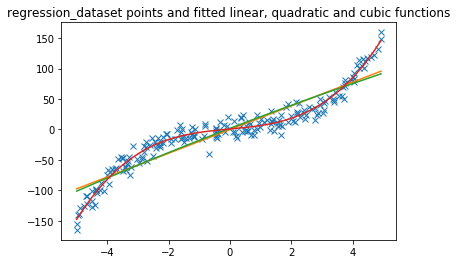

In [10]:
data = np.loadtxt('regression_dataset')
data_x = data[:,0]
data_y = data[:,1]

# we now fit the data with a linear model
a, fitting_error = do_regression(data_x, data_y, 1)

# and we a quadratic model
b, fitting_error2 = do_regression(data_x, data_y, 2)

# and we a cubic model
c, fitting_error3 = do_regression(data_x, data_y, 3)

display(Markdown('***Fitting results for the linear model***'))
display(Markdown('the regressed values are ' + '%f'%a[0] + ' and ' + '%f'%a[1]))
display(Markdown('the fitting error is ' +  '%f'%fitting_error))

display(Markdown('***Fitting results for the quadratic model***'))
display(Markdown('the regressed values are ' + '%f'%b[0] + ', ' + '%f'%b[1] + ' and ' + '%f'%b[2]))
display(Markdown('the fitting error is ' +  '%f'%fitting_error2))

display(Markdown('***Fitting results for the quadratic model***'))
display(Markdown('the regressed values are ' + '%f'%c[0] + ', ' + '%f'%c[1] +'%f'%c[2] +' and ' + '%f'%c[3]))
display(Markdown('the fitting error is ' +  '%f'%fitting_error3))


plt.figure()
# we sort the data to make the plot pretty
plot_x = np.sort(data_x)
plt.plot(data_x, data_y, 'x', label = 'k=1')
plt.plot(plot_x, a[0] + a[1]*plot_x,label = 'k=2')
plt.plot(plot_x, b[0] + b[1]*plot_x + b[2]*plot_x**2,label = 'k=3')
plt.legend(loc)

plt.plot(plot_x, c[0] + c[1]*plot_x + c[2]*plot_x**2 + c[3]*plot_x**3)
plt.title('regression_dataset points and fitted linear, quadratic and cubic functions')





In [11]:
def do_periodic_regression(data_x, data_y, degree):
    """
    This function perform linear least squares to find a polynomial that fits the data
    
    Arguments:
    data_x: numpy array (1D) that contains the x data
    data_Y: numpy array (1D) that contains the y data
    degree: degree of  the polynomial to fit (1 is for a line)
    
    returns: an array of paramters for the fit
    """
    X = np.empty([len(data_x), 2*degree+1])
    Y = np.empty([len(data_y)])
    # for each data point
    for i,x in enumerate(data_x):
        X[i,0] = 1.
        Y[i] = data_y[i]
        for j in range(degree):
            X[i,2*j+1] = np.cos(2.*np.pi*float(j+1)*data_x[i])
            X[i,2*j+2] = np.sin(2.*np.pi*float(j+1)*data_x[i])
        
    #construct X^T X
    XTX = X.transpose().dot(X)
    
    a = np.linalg.solve(XTX, X.transpose().dot(Y))
    
    fitting_error = (X.dot(a) - Y).dot(X.dot(a) - Y)
    
    return a, fitting_error

the regressed values are [ 1.91021086  1.90038184 -0.03096971]

the fitting error is 236.997620

***Fitting results for the quadratic model***

the regressed values are [  2.00000000e+00   2.00000000e+00  -2.09291212e-17   2.27575159e-17
   1.50000000e+00]

the fitting error is 0.000000

Text(0.5,1,'regression_dataset2, fitted linear and quadratic functions')

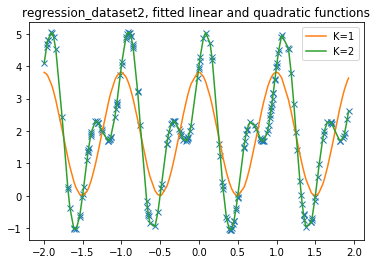

In [12]:

data = np.loadtxt('regression_dataset2')
data_x = data[:,0]
data_y = data[:,1]

# we now fit the data with a linear model
a, fitting_error = do_periodic_regression(data_x, data_y, 1)

# and we a quadratic model
b, fitting_error2 = do_periodic_regression(data_x, data_y, 2)

display(Markdown('the regressed values are ' + np.array2string(a)))
display(Markdown('the fitting error is ' +  '%f'%fitting_error))

display(Markdown('***Fitting results for the quadratic model***'))
display(Markdown('the regressed values are ' + np.array2string(b)))
display(Markdown('the fitting error is ' +  '%f'%fitting_error2))

plt.figure()
# we sort the data to make the plot pretty
plot_x = np.sort(data_x)
plt.plot(data_x, data_y, 'x')
plt.plot(plot_x, a[0] + a[1]*np.cos(2*np.pi*plot_x) + a[2]*np.sin(2*np.pi*plot_x), label = 'K=1')
plt.plot(plot_x, b[0] + b[1]*np.cos(2*np.pi*plot_x) + b[2]*np.sin(2*np.pi*plot_x) + b[3]*np.cos(4.*np.pi*plot_x) + b[4]*np.sin(4.*np.pi*plot_x), label = 'K=2')
plt.legend(loc='best')

plt.title('regression_dataset2, fitted linear and quadratic functions')